# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

In [2]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import seaborn as sns
from MCForecastTools import MCSimulation
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go
import yfinance as yf
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import sympy as sym
import mplfinance as mpf
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

%matplotlib inline
%matplotlib widget
#%matplotlib notebook
plt.ion()

In [13]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 3 Years Worth of Data via API Call and Read in as DataFrame 

In [3]:
# Set the ticker
ticker = "SQ"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2018-06-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-21", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data.head()

SQ                                 
                            open   high    low    close    volume
time                                                             
2018-06-21 00:00:00-04:00  68.78  69.40  66.27  67.1000   8744295
2018-06-22 00:00:00-04:00  68.17  68.17  65.11  65.7400   8142562
2018-06-25 00:00:00-04:00  64.00  64.15  60.87  61.9100  13109536
2018-06-26 00:00:00-04:00  62.03  63.40  61.11  62.5401  11189666
2018-06-27 00:00:00-04:00  63.85  64.16  59.83  60.0700   9672115

### Run the Monte Carlo Simulation

In [4]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_fiveyear = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)

In [5]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2          3         4          5         6    \
0    1.000000  1.000000  1.000000   1.000000  1.000000   1.000000  1.000000   
1    0.968696  1.005896  1.011416   1.041193  1.020780   0.993528  0.975500   
2    0.914739  0.935157  1.011561   1.115602  0.971833   0.994056  0.987075   
3    0.892145  0.916780  0.984230   1.106340  1.021959   0.943490  0.957726   
4    0.907105  0.929387  1.038412   1.106218  1.060122   0.941157  0.985671   
..        ...       ...       ...        ...       ...        ...       ...   
752  2.579664  0.611755  0.645521  23.252888  7.715831  13.832105  0.164210   
753  2.546233  0.635444  0.684187  21.497937  7.832566  13.771185  0.173046   
754  2.724689  0.615305  0.636842  20.788296  8.178889  14.098025  0.180139   
755  2.866032  0.584956  0.657244  20.445881  8.094019  14.681014  0.179424   
756  2.877012  0.580053  0.628523  20.815514  8.331011  14.499861  0.181017   

          7          8         9    ...       990        991        992  \
0    1.000000   1.000000  1.000000  ...  1.000000   1.000000   1.000000   
1    1.033294   0.961819  0.988457  ...  1.006463   0.983059   1.011658   
2    1.049957   0.933686  1.015081  ...  1.049296   0.962601   1.048958   
3    1.042968   0.949227  1.039130  ...  1.027811   0.989911   1.057936   
4    1.108266   0.971011  1.024957  ...  1.034912   0.942647   0.999680   
..        ...        ...       ...  ...       ...        ...        ...   
752  3.889358  14.123987  5.265988  ...  0.978236  12.560931   9.558792   
753  3.927428  15.322530  5.394360  ...  1.047242  12.508903   9.354918   
754  4.154341  14.221788  5.450097  ...  0.978285  12.377841   9.335335   
755  4.335451  13.169454  5.754691  ...  0.968651  12.424852   9.678008   
756  4.620294  12.977308  5.970062  ...  1.025204  11.342622  10.047472   

           993       994       995       996       997       998       999  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.988305  1.004460  1.005772  0.989383  1.046494  1.002274  1.038546  
2     1.053887  1.006037  1.034650  0.928191  1.100928  1.035381  0.957174  
3     1.062740  1.029492  1.007499  0.887900  1.140547  0.980862  1.005842  
4     1.075958  1.031688  1.026873  0.894178  1.077194  1.001862  0.969244  
..         ...       ...       ...       ...       ...       ...       ...  
752   9.755857  4.759265  1.163089  7.566701  2.476996  6.398188  2.683632  
753  10.005529  4.750214  1.169525  7.541468  2.399490  6.570939  2.747220  
754   9.967527  4.790991  1.163477  7.421525  2.403079  6.916713  2.907875  
755  10.405147  4.882539  1.131128  7.712555  2.599572  6.914878  2.901157  
756  10.330084  5.165704  1.211832  7.513068  2.453211  7.167685  2.945996  

[757 rows x 1000 columns]

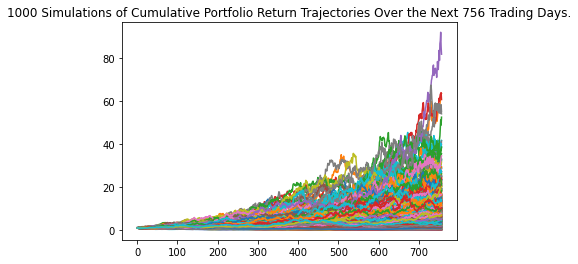

In [6]:
line_plot = MC_fiveyear.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for `TSLA` over the Next Year (252 Trading Days)

In [7]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_fiveyear.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.002813  1.002596  0.873175  1.114647
2  1.005703  1.005122  0.810602  1.176131
3  1.006246  1.003083  0.788104  1.213420
4  1.008347  1.005390  0.790545  1.268904

<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of AMD Stock Over the Next Year'}>

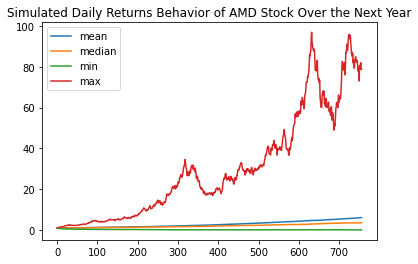

In [12]:
# Use the `plot` function to visually analyze the trajectory of TSLA stock daily returns on the next three years of trading days simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of AMD Stock Over the Next Year")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [13]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

mean        median           min           max
0  10000.000000  10000.000000  10000.000000  10000.000000
1  10036.774541  10052.113000   8806.836799  11404.784360
2  10065.776527  10060.446998   8329.218296  12093.820110
3  10082.261747  10057.225676   8283.591067  12097.976533
4  10117.258415  10097.352976   8100.859429  13158.044433

### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `252` Trading Days

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of AMD Stock Over the Next Year'}>

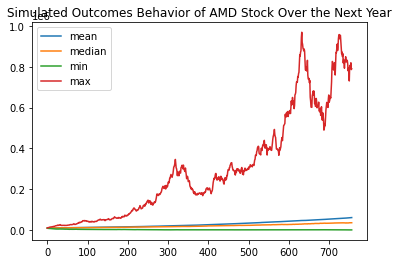

In [14]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of AMD Stock Over the Next Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               6.126891
std                7.489043
min                0.092946
25%                1.872776
50%                3.602009
75%                7.698210
max               79.019173
95% CI Lower       0.467962
95% CI Upper      23.670765
Name: 756, dtype: float64


In [18]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $4679.62 and $236707.65.


<AxesSubplot:xlabel='time'>

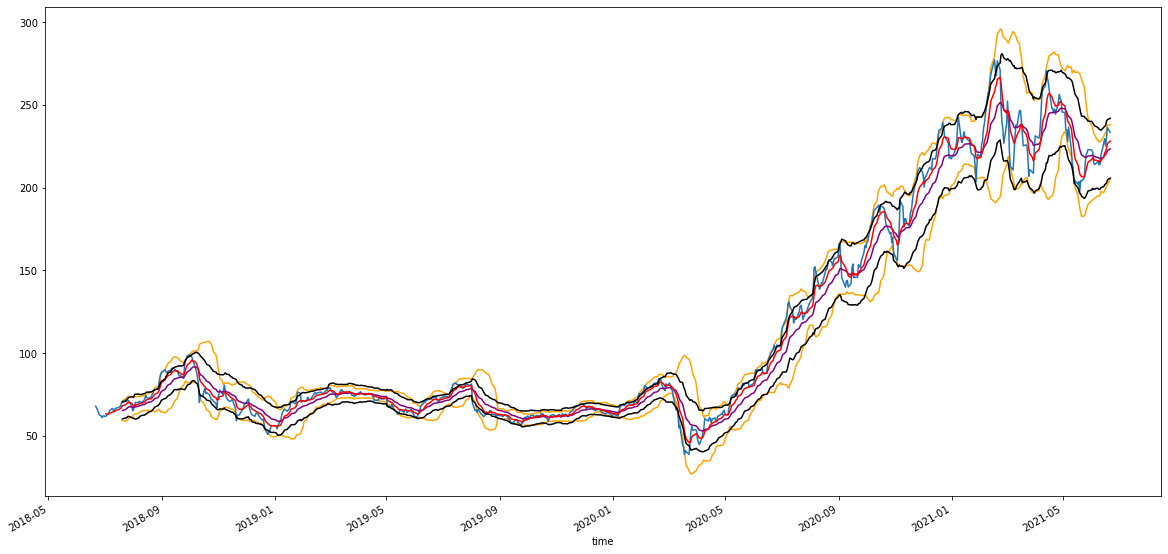

In [19]:
ema21_ohlc4 = ta.ema(ta.ohlc4(ticker_data['SQ']["open"], ticker_data['SQ']["high"], ticker_data['SQ']["low"], ticker_data['SQ']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(ticker_data['SQ']["open"], ticker_data['SQ']["high"], ticker_data['SQ']["low"], ticker_data['SQ']["close"]), length=8)
#df_closing_prices.plot(figsize = (20,10))
candles = ta.ha(ticker_data['SQ']["open"], ticker_data['SQ']["high"], ticker_data['SQ']["low"], ticker_data['SQ']["close"], offset=None)
bbands = ta.bbands(ticker_data['SQ']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(ticker_data['SQ']["high"], ticker_data['SQ']["low"], ticker_data['SQ']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(ticker_data['SQ']["high"], ticker_data['SQ']["low"], ticker_data['SQ']["close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(ticker_data['SQ']["high"], ticker_data['SQ']["low"],  ticker_data['SQ']["close"], length=21, scalar=2, mamode='ema', offset=0)

fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10), color = 'orange')
bbands['BBU_20_2.0'].plot(figsize = (20,10), color = 'orange')
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10), color = 'purple')
ema08_ohlc4.plot(figsize = (20,10), color = 'red')
kc['KCLe_21_2.0'].plot(figsize = (20,10), color = 'black')
kc['KCUe_21_2.0'].plot(figsize = (20,10), color = 'black')

<AxesSubplot:xlabel='time'>

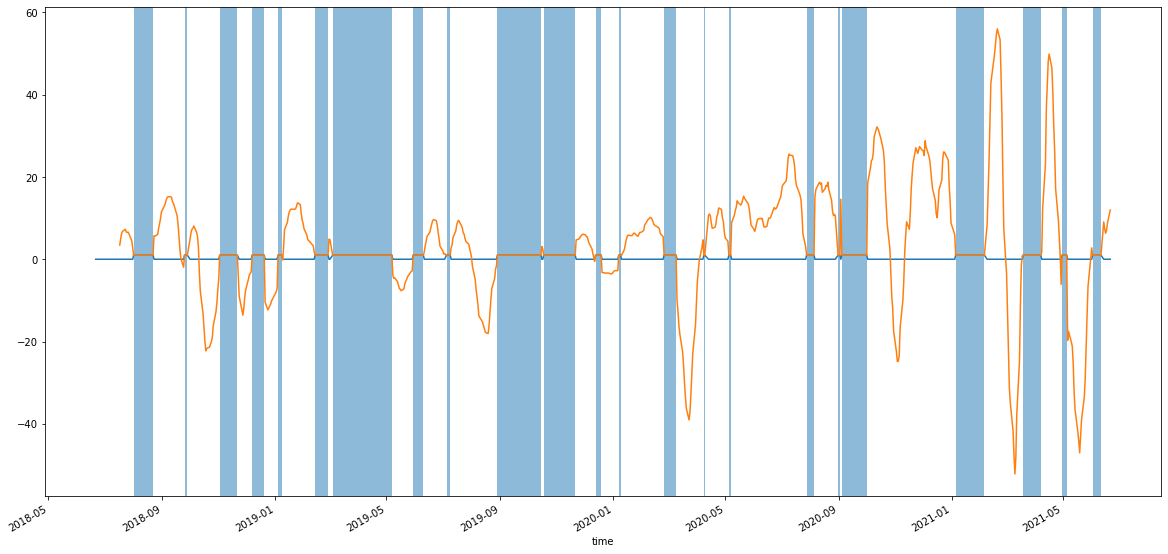

In [20]:
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(ticker_data['SQ'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(ticker_data['SQ'].index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

In [21]:
help(ta.dpo)

Help on function dpo in module pandas_ta.trend.dpo:

dpo(close, length=None, centered=True, offset=None, **kwargs)
    Detrend Price Oscillator (DPO)
    
    Is an indicator designed to remove trend from price and make it easier to
    identify cycles.
    
    Sources:
        https://www.tradingview.com/scripts/detrendedpriceoscillator/
        https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/dpo
        http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:detrended_price_osci
    
    Calculation:
        Default Inputs:
            length=20, centered=True
        SMA = Simple Moving Average
        t = int(0.5 * length) + 1
    
        DPO = close.shift(t) - SMA(close, length)
        if centered:
            DPO = DPO.shift(-t)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 1
        centered (bool): Shift the dpo back by int(0.5 * length) + 1.

In [15]:
tickers = ['NFLX', 'AAPL', 'FB', 'GOOG', 'AMZN']

ticker_dict_1mo = {}
ticker_dict_1wk = {}
ticker_dict_1d = {}
for stock in tickers:
    ticker_dict_1mo[stock] = yf.Ticker(stock).history(period="10y", interval='1mo')
    ticker_dict_1mo[stock]["ticker"] = stock
    ticker_dict_1wk[stock] = yf.Ticker(stock).history(period="10y", interval='1wk')
    ticker_dict_1wk[stock]['ticker'] = stock
    ticker_dict_1d[stock] = yf.Ticker(stock).history(period="10y", interval='1d')
    ticker_dict_1d[stock]['ticker'] = stock
    
ticker_dict_1mo['AAPL']

monthly_data = pd.concat(ticker_dict_1mo.values())
monthly_data

#monthly_df = monthly_data.groupby([monthly_data.index, "ticker"])
#monthly_df
#sfo_sales_df = pd.DataFrame(sfo_sales).reset_index()

#stock = yf.Ticker("NFLX")
#print(stock.info)

Open         High          Low        Close        Volume  \
Date                                                                           
2011-08-01    38.362858    38.500000    29.049999    33.572857  6.405847e+08   
2011-09-01    33.504288    34.071430    15.375714    16.181429  1.679588e+09   
2011-10-01    16.448570    18.357143    10.607143    11.725714  1.691083e+09   
2011-11-01    11.444286    13.405714     8.910000     9.218571  1.053462e+09   
2011-12-01     9.202857    11.084286     9.142857     9.898571  8.420356e+08   
...                 ...          ...          ...          ...           ...   
2021-04-01  3117.939941  3554.000000  3115.550049  3467.419922  7.683960e+07   
2021-05-01  3484.729980  3486.649902  3127.370117  3223.070068  7.518390e+07   
2021-06-01  3243.500000  3524.860107  3172.199951  3440.159912  6.701100e+07   
2021-07-01  3434.610107  3773.080078  3409.419922  3656.639893  5.819830e+07   
2021-07-26  3673.169922  3712.080078  3647.250000  3699.820068  2.900068e+06   

            Dividends  Stock Splits ticker  
Date                                        
2011-08-01        0.0           0.0   NFLX  
2011-09-01        0.0           0.0   NFLX  
2011-10-01        0.0           0.0   NFLX  
2011-11-01        0.0           0.0   NFLX  
2011-12-01        0.0           0.0   NFLX  
...               ...           ...    ...  
2021-04-01        0.0           0.0   AMZN  
2021-05-01        0.0           0.0   AMZN  
2021-06-01        0.0           0.0   AMZN  
2021-07-01        0.0           0.0   AMZN  
2021-07-26        0.0           0.0   AMZN  

[610 rows x 8 columns]

In [17]:
#1 month Loop
candles_mo = {}
ema21_ohlc4_mo = {}
ema08_ohlc4_mo = {}
bbands_mo = {}
squeeze_mo = {}
kc_mo = {}
adx_mo = {}

for stock in tickers:
    candles_mo[stock] = ta.ha(ticker_dict_1mo[stock]["Open"], ticker_dict_1mo[stock]["High"], 
                       ticker_dict_1mo[stock]["Low"], ticker_dict_1mo[stock]["Close"], offset=None)
    ema21_ohlc4_mo[stock] = ta.ema(ta.ohlc4(ticker_dict_1mo[stock]["Open"], ticker_dict_1mo[stock]["High"], 
                                     ticker_dict_1mo[stock]["Low"], ticker_dict_1mo[stock]["Close"]), length=21)
    ema08_ohlc4_mo[stock] = ta.ema(ta.ohlc4(ticker_dict_1mo[stock]["Open"], ticker_dict_1mo[stock]["High"], ticker_dict_1mo[stock]["Low"], 
                                     ticker_dict_1mo[stock]["Close"]), length=8)
#df_closing_prices.plot(figsize = (20,10))
    bbands_mo[stock] = ta.bbands(ticker_dict_1mo[stock]["Close"], length=20, std=None, mamode='ema', offset=None)
    squeeze_mo[stock] = ta.squeeze(ticker_dict_1mo[stock]["High"], ticker_dict_1mo[stock]["Low"], ticker_dict_1mo[stock]["Close"], 
                                   bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
#tr_mo = ta.atr(hist_stock["High"], hist_stock["Low"], hist_stock["Close"], length=14, mamode="ema", drift=1, offset=0)
    kc_mo[stock] = ta.kc(ticker_dict_1mo[stock]["High"], ticker_dict_1mo[stock]["Low"], ticker_dict_1mo[stock]["Close"], 
                         length=21, scalar=2, mamode='ema', offset=0)
    adx_mo[stock] = ta.adx(ticker_dict_1mo[stock]["High"], ticker_dict_1mo[stock]["Low"], ticker_dict_1mo[stock]["Close"], 
                           length=14, scalar=100, drift=1, offset=0)

#fig = plt.figure()
fig = plt.figure()
bbands_mo['AMZN']['BBL_20_2.0'].plot(figsize = (20,10), color = 'red')
bbands_mo['AMZN']['BBU_20_2.0'].plot(figsize = (20,10), color = 'red')
candles_mo['AMZN']['HA_close'].plot(figsize = (10,5), color =  'green')
#candles_mo['NFLX'].columns = ['Open','High','Low', 'Close']
#mpf.plot(ticker_dict_1mo['NFLX'])
ema21_ohlc4_mo['AMZN'].plot(figsize = (10,5), color = 'orange')
ema08_ohlc4_mo['AMZN'].plot(figsize = (10,5), color = 'purple')
kc_mo['AMZN']['KCLe_21_2.0'].plot(figsize = (10,5), color = 'blue')
kc_mo['AMZN']['KCUe_21_2.0'].plot(figsize = (10,5), color = 'blue')
#plt.close()

#squeeze_mo['NFLX'].plot()
fig=plt.figure()
adx_mo['AMZN'].plot(figsize = (10,5))
#plt.close()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

In [18]:
squeeze_mo['AMZN'][squeeze_mo['AMZN']['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
ax.fill_between(ticker_dict_1mo['AMZN'].index, 0, 1, where=squeeze_mo['AMZN']['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_mo_final = plt.plot(ticker_dict_1mo['AMZN'].index, squeeze_mo['AMZN']['SQZ_ON'])
squeeze_mo_final

#squeeze_dow['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
plt.bar(ticker_dict_1mo['AMZN'].index, squeeze_mo['AMZN']['SQZ_20_2.0_21_2.0'], width=5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<BarContainer object of 121 artists>

In [ ]:
candles_mo['NFLX'].head()

In [8]:
tickers_env = ['^DJI', 'SPY', 'QQQ', '^VIX']

ticker_dict_env = {}
for stock in tickers_env:
    ticker_dict_env[stock] = yf.Ticker(stock).history(period="2y", interval='1d')

ticker_dict_env['SPY']

Open        High         Low       Close     Volume  \
Date                                                                    
2019-07-24  289.029383  291.202972  288.932774  291.202972   47213200   
2019-07-25  290.719939  290.777899  288.952070  289.811859   55394100   
2019-07-26  290.546052  291.966131  290.410792  291.753601   45084100   
2019-07-29  291.628009  291.753599  290.632990  291.222260   38126500   
2019-07-30  289.724896  290.942115  289.319146  290.507385   45849000   
...                ...         ...         ...         ...        ...   
2021-07-19  426.190002  431.410004  421.970001  424.970001  147987000   
2021-07-20  425.679993  432.420013  424.829987  431.059998   99608200   
2021-07-21  432.339996  434.700012  431.010010  434.549988   64724400   
2021-07-22  434.739990  435.720001  433.690002  435.459991   47878500   
2021-07-23  437.519989  440.299988  436.790009  439.940002   63731900   

            Dividends  Stock Splits  
Date                                 
2019-07-24        0.0             0  
2019-07-25        0.0             0  
2019-07-26        0.0             0  
2019-07-29        0.0             0  
2019-07-30        0.0             0  
...               ...           ...  
2021-07-19        0.0             0  
2021-07-20        0.0             0  
2021-07-21        0.0             0  
2021-07-22        0.0             0  
2021-07-23        0.0             0  

[505 rows x 7 columns]

In [19]:
market_spy = yf.Ticker("SPY")
print(market_spy.info)

{'exchange': 'PCX', 'shortName': 'SPDR S&P 500', 'longName': 'SPDR S&P 500 ETF Trust', 'exchangeTimezoneName': 'America/New_York', 'exchangeTimezoneShortName': 'EDT', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '-14400000', 'quoteType': 'ETF', 'symbol': 'SPY', 'messageBoardId': 'finmb_6160262', 'market': 'us_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': None, 'beta3Year': 1, 'profitMargins': None, 'enterpriseToEbitda': None, '52WeekChange': None, 'morningStarRiskRating': None, 'forwardEps': None, 'revenueQuarterlyGrowth': None, 'fundInceptionDate': 727660800, 'annualReportExpenseRatio': None, 'totalAssets': 374031319040, 'bookValue': None, 'fundFamily': 'SPDR State Street Global Advisors', 'lastFiscalYearEnd': None, 'netIncomeToCommon': None, 'trailingEps': None, 'lastDividendValue': None, 'SandP52WeekChange': None, 'priceToBook': None, 'nextFiscalYearEnd': None, 'yield': 0.012999999, 'mostRecentQuarter': None, 'enterpriseValue': None, 'priceHint': 2, 'threeYear

In [20]:
market_dow = yf.Ticker("^DJI")
print(market_dow.info)

{'exchange': 'DJI', 'shortName': 'Dow Jones Industrial Average', 'exchangeTimezoneName': 'America/New_York', 'exchangeTimezoneShortName': 'EDT', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '-14400000', 'quoteType': 'INDEX', 'symbol': '^DJI', 'messageBoardId': 'finmb_INDEXDJI', 'market': 'us_market', 'previousClose': 35061.55, 'regularMarketOpen': 35055.86, 'twoHundredDayAverage': 33142.457, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 35150.37, 'navPrice': None, 'averageDailyVolume10Day': 350040000, 'totalAssets': None, 'regularMarketPreviousClose': 35061.55, 'fiftyDayAverage': 34455.586, 'trailingAnnualDividendRate': None, 'open': 35055.86, 'toCurrency': None, 'averageVolume10days': 350040000, 'expireDate': None, 'yield': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 34950.19, 'priceHint': 2, 'currency': 'USD', 'regu

In [21]:
market_qqq = yf.Ticker("QQQ")
print(market_qqq.info)

{'exchange': 'NMS', 'shortName': 'Invesco QQQ Trust, Series 1', 'longName': 'Invesco QQQ Trust', 'exchangeTimezoneName': 'America/New_York', 'exchangeTimezoneShortName': 'EDT', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '-14400000', 'quoteType': 'ETF', 'symbol': 'QQQ', 'messageBoardId': 'finmb_8108558', 'market': 'us_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': None, 'beta3Year': 1.02, 'profitMargins': None, 'enterpriseToEbitda': None, '52WeekChange': None, 'morningStarRiskRating': None, 'forwardEps': None, 'revenueQuarterlyGrowth': None, 'fundInceptionDate': 921024000, 'annualReportExpenseRatio': None, 'totalAssets': 174510718976, 'bookValue': None, 'fundFamily': 'Invesco', 'lastFiscalYearEnd': None, 'netIncomeToCommon': None, 'trailingEps': None, 'lastDividendValue': None, 'SandP52WeekChange': None, 'priceToBook': None, 'nextFiscalYearEnd': None, 'yield': 0.0049, 'mostRecentQuarter': None, 'enterpriseValue': None, 'priceHint': 2, 'threeYearAverageReturn': 0.

In [22]:
vix = yf.Ticker("^VIX")
print(vix.info)

{'exchange': 'WCB', 'shortName': 'CBOE Volatility Index', 'exchangeTimezoneName': 'America/New_York', 'exchangeTimezoneShortName': 'EDT', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '-14400000', 'quoteType': 'INDEX', 'symbol': '^VIX', 'messageBoardId': 'finmb_INDEXVIX', 'market': 'us_market', 'previousClose': 17.2, 'regularMarketOpen': 18.67, 'twoHundredDayAverage': 20.080593, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 19.39, 'navPrice': None, 'averageDailyVolume10Day': 0, 'totalAssets': None, 'regularMarketPreviousClose': 17.2, 'fiftyDayAverage': 17.105757, 'trailingAnnualDividendRate': None, 'open': 18.67, 'toCurrency': None, 'averageVolume10days': 0, 'expireDate': None, 'yield': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 17.53, 'priceHint': 2, 'currency': 'USD', 'regularMarketVolume': 0, 'lastMarket': None, 'm

In [1]:
help(ta.squeeze)

NameError: name 'ta' is not defined

In [23]:
spy_hist = market_spy.history(period="1y", interval='1d')
spy_hist.index.duplicated().sum()
hist_spy = spy_hist.loc[~spy_hist.index.duplicated(keep='first')]
hist_spy
#hist_spy.head()
#spy_hist

Open        High         Low       Close    Volume  \
Date                                                                   
2020-07-27  316.909779  318.663654  316.062384  318.476440  48293000   
2020-07-28  317.698031  318.890295  316.141232  316.456543  57495000   
2020-07-29  317.392569  320.949605  317.353148  320.348541  48454200   
2020-07-30  317.175832  319.649005  314.949020  319.205597  61861700   
2020-07-31  321.117070  321.836368  316.614133  321.727966  84986800   
...                ...         ...         ...         ...       ...   
2021-07-20  425.679993  432.420013  424.829987  431.059998  99501600   
2021-07-21  432.339996  434.700012  431.010010  434.549988  64623000   
2021-07-22  434.739990  435.720001  433.690002  435.459991  47878500   
2021-07-23  437.519989  440.299988  436.790009  439.940002  63731900   
2021-07-26  439.309998  441.029999  439.260010  441.019989  43719187   

            Dividends  Stock Splits  
Date                                 
2020-07-27        0.0             0  
2020-07-28        0.0             0  
2020-07-29        0.0             0  
2020-07-30        0.0             0  
2020-07-31        0.0             0  
...               ...           ...  
2021-07-20        0.0             0  
2021-07-21        0.0             0  
2021-07-22        0.0             0  
2021-07-23        0.0             0  
2021-07-26        0.0             0  

[252 rows x 7 columns]

In [24]:
dow_hist = market_dow.history(period="1y", interval='1d')
dow_hist.index.duplicated().sum()
hist_dow = dow_hist.loc[~dow_hist.index.duplicated(keep='first')]
hist_dow.head()

Open          High           Low         Close     Volume  \
Date                                                                            
2020-07-27  26447.669922  26625.460938  26426.919922  26584.769531  400930000   
2020-07-28  26529.449219  26556.839844  26361.710938  26379.279297  361090000   
2020-07-29  26388.439453  26602.449219  26375.390625  26539.570312  347580000   
2020-07-30  26367.419922  26374.929688  25992.279297  26313.650391  351540000   
2020-07-31  26409.330078  26440.019531  26013.589844  26428.320312  488050000   

            Dividends  Stock Splits  
Date                                 
2020-07-27          0             0  
2020-07-28          0             0  
2020-07-29          0             0  
2020-07-30          0             0  
2020-07-31          0             0

In [25]:
qqq_hist = market_qqq.history(period="1y", interval='1d')
qqq_hist.index.duplicated().sum()
hist_qqq = qqq_hist.loc[~qqq_hist.index.duplicated(keep='first')]
hist_qqq.head()

Open        High         Low       Close    Volume  \
Date                                                                   
2020-07-27  256.173456  259.419667  255.366880  259.021362  36445700   
2020-07-28  258.214767  258.752495  255.426606  255.725327  31302400   
2020-07-29  257.308643  259.559107  256.820722  258.672852  27556900   
2020-07-30  256.651403  260.604637  255.466427  260.027100  41774500   
2020-07-31  264.786938  264.826778  259.748312  264.667450  53686300   

            Dividends  Stock Splits  
Date                                 
2020-07-27        0.0             0  
2020-07-28        0.0             0  
2020-07-29        0.0             0  
2020-07-30        0.0             0  
2020-07-31        0.0             0

In [45]:
hist = stock.history(period="10y", interval='1mo')
hist.index.duplicated().sum()
hist_stock = hist.loc[~hist.index.duplicated(keep='first')]

AttributeError: 'str' object has no attribute 'history'

In [12]:
hist1 = stock.history(period="10y", interval='1wk')
hist1.index.duplicated().sum()
hist1_stock = hist1.loc[~hist1.index.duplicated(keep='first')]

In [13]:
hist2 = stock.history(period="10y", interval='1d')
hist2.index.duplicated().sum()
hist2_stock = hist2.loc[~hist2.index.duplicated(keep='first')]

In [14]:
hist2_stock.index.duplicated().sum()

0

In [63]:
hist_vix = vix.history(period="1y", interval='1d')
hist_vix.head()

Open       High        Low      Close  Volume  Dividends  \
Date                                                                        
2020-07-27  26.600000  26.940001  24.549999  24.740000       0          0   
2020-07-28  24.860001  25.850000  24.049999  25.440001       0          0   
2020-07-29  25.160000  25.420000  23.730000  24.100000       0          0   
2020-07-30  25.040001  28.290001  24.639999  24.760000       0          0   
2020-07-31  24.790001  26.410000  23.549999  24.459999       0          0   

            Stock Splits  
Date                      
2020-07-27             0  
2020-07-28             0  
2020-07-29             0  
2020-07-30             0  
2020-07-31             0

In [26]:
ema21_ohlc4_dow = ta.ema(ta.ohlc4(hist_dow["Open"], hist_dow["High"], hist_dow["Low"], hist_dow["Close"]), length=21)
ema08_ohlc4_dow = ta.ema(ta.ohlc4(hist_dow["Open"], hist_dow["High"], hist_dow["Low"], hist_dow["Close"]), length=8)
ema34_ohlc4_dow = ta.ema(ta.ohlc4(hist_dow["Open"], hist_dow["High"], hist_dow["Low"], hist_dow["Close"]), length=34)
ema55_ohlc4_dow = ta.ema(ta.ohlc4(hist_dow["Open"], hist_dow["High"], hist_dow["Low"], hist_dow["Close"]), length=55)
ema89_ohlc4_dow = ta.ema(ta.ohlc4(hist_dow["Open"], hist_dow["High"], hist_dow["Low"], hist_dow["Close"]), length=89)


#df_closing_prices.plot(figsize = (20,10))
candles_dow = ta.ha(hist_dow["Open"], hist_dow["High"], hist_dow["Low"], hist_dow["Close"], offset=None)
bbands_dow = ta.bbands(hist_dow["Close"], length=20, std=None, mamode='ema', offset=None)
squeeze_dow = ta.squeeze(hist_dow["High"], hist_dow["Low"], hist_dow["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, 
                         mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr_dow = ta.atr(hist_dow["High"], hist_dow["Low"], hist_dow["Close"], length=14, mamode="ema", drift=1, offset=0)
kc_dow = ta.kc(hist_dow["High"], hist_dow["Low"], hist_dow["Close"], length=21, scalar=2, mamode='ema', offset=0)
adx_dow = ta.adx(hist_dow["High"], hist_dow["Low"], hist_dow["Close"], length=14, scalar=100, drift=1, offset=0)
dpo_dow = ta.dpo(hist_dow["Close"], length=21, centered=True, offset=0)

#candles_dow.columns = ['Open','High', 'Low', 'Close']
#fig = plt.figure()
fig = plt.figure(figsize = (10,5))
#fig, ax = plt.subplots(figsize = (20,10))
#candlestick2_ohlc(ax, hist_dow["Open"], hist_dow["High"], hist_dow["Low"], hist_dow["Close"], width = 0.6,
                 #colorup = 'green', colordown = 'red', 
                # alpha = 0.8)
#mpf.plot(hist_dow,type='candle')
bbands_dow['BBL_20_2.0'].plot(figsize = (10,5), color = 'orange')
bbands_dow['BBU_20_2.0'].plot(figsize = (10,5), color = 'orange')
#mpf.plot(hist_dow)
candles_dow['HA_close'].plot(figsize = (10,5))
ema21_ohlc4_dow.plot(figsize = (10,5), color = 'purple')
ema08_ohlc4_dow.plot(figsize = (10,5), color = 'red')
kc_dow['KCLe_21_2.0'].plot(figsize = (10,5), color = 'black')
kc_dow['KCUe_21_2.0'].plot(figsize = (10,5), color = 'black')
adx_dow.plot(figsize = (10,5))
#dpo_dow.plot(figsize = (20,10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

In [41]:
import mplfinance as mpf
mpf.plot(hist_dow,type='candle')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [27]:
fig = plt.figure()
candles_dow['HA_close'].plot(figsize = (10,5))
ema21_ohlc4_dow.plot(figsize = (10,5), color = 'purple')
ema08_ohlc4_dow.plot(figsize = (10,5), color = 'red')
ema34_ohlc4_dow.plot(figsize = (10,5), color = 'green')
ema55_ohlc4_dow.plot(figsize = (10,5), color = 'blue')
ema89_ohlc4_dow.plot(figsize = (10,5), color = 'orange')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

In [11]:
squeeze_dow.dropna().tail(20)

SQZ_20_2.0_21_2.0  SQZ_ON  SQZ_OFF  SQZ_NO
Date                                                  
2021-06-23        -804.136719       0        1       0
2021-06-24        -788.673828       0        1       0
2021-06-25        -665.580729       0        1       0
2021-06-28        -477.692057       0        1       0
2021-06-29        -392.232422       0        1       0
2021-06-30        -238.970052       0        1       0
2021-07-01         -57.269531       0        1       0
2021-07-02         135.343750       0        1       0
2021-07-06         263.214193       0        1       0
2021-07-07         525.660807       0        1       0
2021-07-08         647.706380       0        1       0
2021-07-09         783.676432       0        1       0
2021-07-12         914.966146       0        1       0
2021-07-13         904.847656       0        1       0
2021-07-14         862.425781       0        1       0
2021-07-15         747.765625       0        1       0
2021-07-16         722.865885       0        1       0
2021-07-19         478.690104       0        0       1
2021-07-20         271.442708       0        0       1
2021-07-21         158.055990       1        0       0

In [29]:
squeeze_dow[squeeze_dow['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
ax.fill_between(hist_dow.index, 0, 1, where=squeeze_dow['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_dow_final = plt.plot(hist_dow.index, squeeze_dow['SQZ_ON'])
squeeze_dow_final

#squeeze_dow['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
plt.bar(hist_dow.index, squeeze_dow['SQZ_20_2.0_21_2.0'], width=2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<BarContainer object of 252 artists>

In [30]:
combined_dow_df = pd.concat([hist_dow, squeeze_dow['SQZ_20_2.0_21_2.0'], squeeze_dow['SQZ_ON'], bbands_dow['BBL_20_2.0'], 
                             bbands_dow['BBU_20_2.0'], kc_dow['KCLe_21_2.0'], kc_dow['KCUe_21_2.0']], axis='columns', join='inner')
#combined_dow_df['lag_SQZ_ON'] = combined_dow_df['SQZ_ON'].shift()
combined_dow_df['change'] = combined_dow_df['Close'].pct_change()
combined_dow_df.dropna(inplace=True)
combined_dow_df.head()

Open          High           Low         Close     Volume  \
Date                                                                            
2020-08-24  28077.580078  28314.939453  28041.750000  28308.460938  383880000   
2020-08-25  28347.419922  28400.740234  28094.570312  28248.439453  338420000   
2020-08-26  28257.880859  28353.800781  28153.910156  28331.919922  327070000   
2020-08-27  28384.070312  28634.220703  28363.929688  28492.269531  404340000   
2020-08-28  28601.289062  28733.349609  28487.980469  28653.869141  369740000   

            Dividends  Stock Splits  SQZ_20_2.0_21_2.0  SQZ_ON    BBL_20_2.0  \
Date                                                                           
2020-08-24          0             0        1078.506836       0  26135.996148   
2020-08-25          0             0         959.123372       0  26255.226136   
2020-08-26          0             0         824.245117       0  26364.651467   
2020-08-27          0             0         787.058268       0  26542.039914   
2020-08-28          0             0         748.019857       0  26723.326610   

              BBU_20_2.0   KCLe_21_2.0   KCUe_21_2.0    change  
Date                                                            
2020-08-24  28658.741966  26741.827009  27957.006696  0.013538  
2020-08-25  28701.620625  26823.124518  28039.167842 -0.002120  
2020-08-26  28754.766064  26923.943987  28102.125417  0.002955  
2020-08-27  28755.008238  27011.555258  28192.556842  0.005660  
2020-08-28  28765.215840  27116.243949  28279.106895  0.005672

In [31]:
 # Create our features
X = combined_dow_df.copy()
X.drop(columns="SQZ_ON", axis=1, inplace=True)

# Create our target
y = combined_dow_df["SQZ_ON"]

y.value_counts()

0    142
1     90
Name: SQZ_ON, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, stratify=y)
X_train.shape

(174, 13)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [35]:
# Scale the training and testing data
X_trained_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Resample the training data with the BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf_model = rf_model.fit(X_trained_scaled, y_train)
predictions = rf_model.predict(X_test_scaled)

In [37]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, predictions)

0.9571428571428571

In [38]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[32,  3],
       [ 0, 23]], dtype=int64)

In [39]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.91      1.00      0.96      0.96      0.91        35
          1       0.88      1.00      0.91      0.94      0.96      0.92        23

avg / total       0.95      0.95      0.97      0.95      0.96      0.91        58



In [40]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_
listed = sorted(zip(rf_model.feature_importances_, X.columns), reverse = True)
listed

[(0.42860140071385094, 'SQZ_20_2.0_21_2.0'),
 (0.10477928955171098, 'BBL_20_2.0'),
 (0.07634841538941975, 'BBU_20_2.0'),
 (0.06876035000767793, 'KCLe_21_2.0'),
 (0.0588384357585695, 'Open'),
 (0.05841979429253596, 'High'),
 (0.05059443480877454, 'Low'),
 (0.048749151930015125, 'Close'),
 (0.04840965241376769, 'KCUe_21_2.0'),
 (0.03450645056080835, 'Volume'),
 (0.021992624572869185, 'change'),
 (0.0, 'Stock Splits'),
 (0.0, 'Dividends')]

In [41]:
# Train the Classifier
from imblearn.ensemble import EasyEnsembleClassifier
eec_model = EasyEnsembleClassifier(n_estimators = 100, random_state = 1)
eec_model = eec_model.fit(X_trained_scaled, y_train)
predictions = eec_model.predict(X_test_scaled)

In [42]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, predictions)

0.9714285714285714

In [43]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[33,  2],
       [ 0, 23]], dtype=int64)

In [44]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.94      1.00      0.97      0.97      0.94        35
          1       0.92      1.00      0.94      0.96      0.97      0.95        23

avg / total       0.97      0.97      0.98      0.97      0.97      0.94        58



In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_trained_scaled, y_train)

LogisticRegression(random_state=1)

In [46]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.8484472049689441

In [47]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[32,  3],
       [ 5, 18]], dtype=int64)

In [48]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.91      0.78      0.89      0.85      0.72        35
          1       0.86      0.78      0.91      0.82      0.85      0.71        23

avg / total       0.86      0.86      0.83      0.86      0.85      0.72        58



In [49]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state = 1)
X_resampled, y_resampled = ros.fit_resample(X_trained_scaled, y_train) 

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
Counter(y_resampled)

Counter({1: 107, 0: 107})

In [50]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.8925465838509317

In [51]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[29,  6],
       [ 1, 22]], dtype=int64)

In [53]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.83      0.96      0.89      0.89      0.78        35
          1       0.79      0.96      0.83      0.86      0.89      0.80        23

avg / total       0.89      0.88      0.91      0.88      0.89      0.79        58



In [54]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
model = LogisticRegression(solver='lbfgs', random_state=1)
X_resampled, y_resampled = SMOTE(random_state = 1, sampling_strategy = 1.0).fit_resample(X_trained_scaled, y_train)
model.fit(X_resampled, y_resampled)
Counter(y_resampled)

Counter({1: 107, 0: 107})

In [55]:
# Calculated the balanced accuracy score
y_pred2 = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred2)

0.9285714285714286

In [56]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred2)

array([[30,  5],
       [ 0, 23]], dtype=int64)

In [57]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred2))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.86      1.00      0.92      0.93      0.84        35
          1       0.82      1.00      0.86      0.90      0.93      0.87        23

avg / total       0.93      0.91      0.94      0.91      0.93      0.85        58



In [58]:
ema21_ohlc4_spy = ta.ema(ta.ohlc4(hist_spy["Open"], hist_spy["High"], hist_spy["Low"], hist_spy["Close"]), length=21)
ema08_ohlc4_spy = ta.ema(ta.ohlc4(hist_spy["Open"], hist_spy["High"], hist_spy["Low"], hist_spy["Close"]), length=8)
#df_closing_prices.plot(figsize = (20,10))
candles_spy = ta.ha(hist_spy["Open"], hist_spy["High"], hist_spy["Low"], hist_spy["Close"], offset=None)
bbands_spy = ta.bbands(hist_spy["Close"], length=20, std=None, mamode='ema', offset=None)
squeeze_spy = ta.squeeze(hist_spy["High"], hist_spy["Low"], hist_spy["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr_spy = ta.atr(hist_spy["High"], hist_spy["Low"], hist_spy["Close"], length=14, mamode="ema", drift=1, offset=0)
kc_spy = ta.kc(hist_spy["High"], hist_spy["Low"], hist_spy["Close"], length=21, scalar=2, mamode='ema', offset=0)
adx_spy = ta.adx(hist_spy["High"], hist_spy["Low"], hist_spy["Close"], length=14, scalar=100, drift=1, offset=0)

#fig = plt.figure()
fig = plt.figure()
bbands_spy['BBL_20_2.0'].plot(figsize = (10,5), color = 'orange')
bbands_spy['BBU_20_2.0'].plot(figsize = (10,5), color = 'orange')
candles_spy['HA_close'].plot(figsize = (10,5))
ema21_ohlc4_spy.plot(figsize = (10,5), color = 'red')
ema08_ohlc4_spy.plot(figsize = (10,5), color = 'purple')
kc_spy['KCLe_21_2.0'].plot(figsize = (10,5), color = 'black')
kc_spy['KCUe_21_2.0'].plot(figsize = (10,5), color = 'black')
adx_spy.plot(figsize = (10,5))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

In [59]:
#squeeze_spy[squeeze_spy['SQZ_ON']==1] = 1
#fig, ax = plt.subplots()
#ax.fill_between(hist_spy.index, 0, 1, where=squeeze_spy['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
#squeeze_spy_final = plt.plot(hist_spy.index, squeeze_spy['SQZ_ON'])
#squeeze_spy_final

#squeeze_spy['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

squeeze_spy[squeeze_spy['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
ax.fill_between(hist_spy.index, 0, 1, where=squeeze_spy['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_spy_final = plt.plot(hist_spy.index, squeeze_spy['SQZ_ON'])
squeeze_spy_final

#squeeze_dow['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
plt.bar(hist_spy.index, squeeze_spy['SQZ_20_2.0_21_2.0'], width=5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<BarContainer object of 252 artists>

In [60]:
ema21_ohlc4_qqq = ta.ema(ta.ohlc4(hist_qqq["Open"], hist_qqq["High"], hist_qqq["Low"], hist_qqq["Close"]), length=21)
ema08_ohlc4_qqq = ta.ema(ta.ohlc4(hist_qqq["Open"], hist_qqq["High"], hist_qqq["Low"], hist_qqq["Close"]), length=8)
#df_closing_prices.plot(figsize = (20,10))
candles_qqq = ta.ha(hist_qqq["Open"], hist_qqq["High"], hist_qqq["Low"], hist_qqq["Close"], offset=None)
bbands_qqq = ta.bbands(hist_qqq["Close"], length=20, std=None, mamode='ema', offset=None)
squeeze_qqq = ta.squeeze(hist_qqq["High"], hist_qqq["Low"], hist_qqq["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr_qqq = ta.atr(hist_qqq["High"], hist_qqq["Low"], hist_qqq["Close"], length=14, mamode="ema", drift=1, offset=0)
kc_qqq = ta.kc(hist_qqq["High"], hist_qqq["Low"], hist_qqq["Close"], length=21, scalar=2, mamode='ema', offset=0)
adx_qqq = ta.adx(hist_qqq["High"], hist_qqq["Low"], hist_qqq["Close"], length=14, scalar=100, drift=1, offset=0)

#fig = plt.figure()
fig = plt.figure()
bbands_qqq['BBL_20_2.0'].plot(figsize = (20,10), color = 'orange')
bbands_qqq['BBU_20_2.0'].plot(figsize = (20,10), color = 'orange')
candles_qqq['HA_close'].plot(figsize = (20,10))
ema21_ohlc4_qqq.plot(figsize = (20,10), color = 'red')
ema08_ohlc4_qqq.plot(figsize = (20,10), color = 'purple')
kc_qqq['KCLe_21_2.0'].plot(figsize = (20,10), color = 'black')
kc_qqq['KCUe_21_2.0'].plot(figsize = (20,10), color = 'black')
adx_qqq.plot(figsize = (20,10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

In [61]:
#squeeze_qqq[squeeze_qqq['SQZ_ON']==1] = 1
#fig, ax = plt.subplots()
#ax.fill_between(hist_qqq.index, 0, 1, where=squeeze_qqq['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
#squeeze_qqq_final = plt.plot(hist_qqq.index, squeeze_qqq['SQZ_ON'])
#squeeze_qqq_final

#squeeze_qqq['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

squeeze_qqq[squeeze_qqq['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
ax.fill_between(hist_qqq.index, 0, 1, where=squeeze_qqq['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_qqq_final = plt.plot(hist_qqq.index, squeeze_qqq['SQZ_ON'])
squeeze_qqq_final

#squeeze_dow['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
plt.bar(hist_qqq.index, squeeze_qqq['SQZ_20_2.0_21_2.0'], width=5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<BarContainer object of 252 artists>

In [25]:
ema21_ohlc4_mo = ta.ema(ta.ohlc4(hist_stock["Open"], hist_stock["High"], hist_stock["Low"], hist_stock["Close"]), length=21)
ema08_ohlc4_mo = ta.ema(ta.ohlc4(hist_stock["Open"], hist_stock["High"], hist_stock["Low"], hist_stock["Close"]), length=8)
#df_closing_prices.plot(figsize = (20,10))
candles_mo = ta.ha(hist_stock["Open"], hist_stock["High"], hist_stock["Low"], hist_stock["Close"], offset=None)
bbands_mo = ta.bbands(hist_stock["Close"], length=20, std=None, mamode='ema', offset=None)
squeeze_mo = ta.squeeze(hist_stock["High"], hist_stock["Low"], hist_stock["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr_mo = ta.atr(hist_stock["High"], hist_stock["Low"], hist_stock["Close"], length=14, mamode="ema", drift=1, offset=0)
kc_mo = ta.kc(hist_stock["High"], hist_stock["Low"], hist_stock["Close"], length=21, scalar=2, mamode='ema', offset=0)
adx_mo = ta.adx(hist_stock["High"], hist_stock["Low"], hist_stock["Close"], length=14, scalar=100, drift=1, offset=0)

#fig = plt.figure()
fig = plt.figure()
bbands_mo['BBL_20_2.0'].plot(figsize = (20,10), color = 'red')
bbands_mo['BBU_20_2.0'].plot(figsize = (20,10), color = 'red')
candles_mo['HA_close'].plot(figsize = (20,10), color =  'green')
ema21_ohlc4_mo.plot(figsize = (20,10), color = 'orange')
ema08_ohlc4_mo.plot(figsize = (20,10), color = 'purple')
kc_mo['KCLe_21_2.0'].plot(figsize = (20,10), color = 'blue')
kc_mo['KCUe_21_2.0'].plot(figsize = (20,10), color = 'blue')
adx_mo.plot(figsize = (20,10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

In [21]:
#squeeze_mo[squeeze_mo['SQZ_ON']==1] = 1
#fig, ax = plt.subplots()
#ax.fill_between(hist_stock.index, 0, 1, where=squeeze_mo['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
#squeeze_mo_final = plt.plot(hist_stock.index, squeeze_mo['SQZ_ON'])
#squeeze_mo_final

#squeeze_mo['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

squeeze_mo[squeeze_mo['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
ax.fill_between(hist_stock.index, 0, 1, where=squeeze_mo['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_mo_final = plt.plot(hist_stock.index, squeeze_mo['SQZ_ON'])
squeeze_mo_final

#squeeze_dow['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
plt.bar(hist_stock.index, squeeze_mo['SQZ_20_2.0_21_2.0'], width=5)

KeyError: 'SQZ_ON'

In [27]:
ema21_ohlc4_we = ta.ema(ta.ohlc4(hist1_stock["Open"], hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"]), length=21)
ema08_ohlc4_we = ta.ema(ta.ohlc4(hist1_stock["Open"], hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"]), length=8)
ema34_ohlc4_we = ta.ema(ta.ohlc4(hist1_stock["Open"], hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"]), length=34)
ema55_ohlc4_we = ta.ema(ta.ohlc4(hist1_stock["Open"], hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"]), length=55)
ema89_ohlc4_we = ta.ema(ta.ohlc4(hist1_stock["Open"], hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"]), length=89)
#df_closing_prices.plot(figsize = (20,10))
candles_we = ta.ha(hist1_stock["Open"], hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"], offset=None)
bbands_we = ta.bbands(hist1_stock["Close"], length=20, std=None, mamode='ema', offset=None)
squeeze_we = ta.squeeze(hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr_we = ta.atr(hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"], length=14, mamode="ema", drift=1, offset=0)
kc_we = ta.kc(hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"], length=21, scalar=2, mamode='ema', offset=0)
adx_we = ta.adx(hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"], length=14, scalar=100, drift=1, offset=0)

fig = plt.figure()
bbands_we['BBL_20_2.0'].plot(figsize = (20,10), color = 'orange')
bbands_we['BBU_20_2.0'].plot(figsize = (20,10), color = 'orange')
candles_we['HA_close'].plot(figsize = (20,10))
ema21_ohlc4_we.plot(figsize = (20,10), color = 'purple')
ema08_ohlc4_we.plot(figsize = (20,10), color = 'red')
kc_we['KCLe_21_2.0'].plot(figsize = (20,10), color = 'black')
kc_we['KCUe_21_2.0'].plot(figsize = (20,10), color = 'black')
adx_we.plot(figsize = (20,10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

In [28]:
fig = plt.figure()
ema21_ohlc4_we.plot(figsize = (20,10), color = 'purple')
ema08_ohlc4_we.plot(figsize = (20,10), color = 'red')
ema34_ohlc4_we.plot(figsize = (20,10), color = 'green')
ema55_ohlc4_we.plot(figsize = (20,10), color = 'blue')
ema89_ohlc4_we.plot(figsize = (20,10), color = 'orange')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

In [29]:
#squeeze_we[squeeze_we['SQZ_ON']==1] = 1
#fig, ax = plt.subplots()
#ax.fill_between(hist1_stock.index, 0, 1, where=squeeze_we['SQZ_ON'], alpha=5, transform=ax.get_xaxis_transform())
#squeeze_we_final = plt.plot(hist1_stock.index, squeeze_we['SQZ_ON'])
#squeeze_we_final

#squeeze_we['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

squeeze_we[squeeze_we['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
ax.fill_between(hist1_stock.index, 0, 1, where=squeeze_we['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_we_final = plt.plot(hist1_stock.index, squeeze_we['SQZ_ON'])
squeeze_we_final

#squeeze_dow['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
plt.bar(hist1_stock.index, squeeze_we['SQZ_20_2.0_21_2.0'], width=5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<BarContainer object of 524 artists>

In [30]:
ema21_ohlc4 = ta.ema(ta.ohlc4(hist2_stock["Open"], hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(hist2_stock["Open"], hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"]), length=8)
ema34_ohlc4 = ta.ema(ta.ohlc4(hist2_stock["Open"], hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"]), length=34)
ema55_ohlc4 = ta.ema(ta.ohlc4(hist2_stock["Open"], hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"]), length=55)
ema89_ohlc4 = ta.ema(ta.ohlc4(hist2_stock["Open"], hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"]), length=89)

#df_closing_prices.plot(figsize = (20,10))
candles = ta.ha(hist2_stock["Open"], hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], offset=None)
bbands = ta.bbands(hist2_stock["Close"], length=20, std=None, mamode='ema', offset=None)
squeeze = ta.squeeze(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
squeeze1 = ta.squeeze(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=1.5, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
squeeze2 = ta.squeeze(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=1, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], length=21, scalar=2, mamode='ema', offset=0)
adx = ta.adx(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], length=14, scalar=100, drift=1, offset=0)

fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10), color = 'orange')
bbands['BBU_20_2.0'].plot(figsize = (20,10), color = 'orange')
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10), color = 'purple')
ema08_ohlc4.plot(figsize = (20,10), color = 'red')
kc['KCLe_21_2.0'].plot(figsize = (20,10), color = 'black')
kc['KCUe_21_2.0'].plot(figsize = (20,10), color = 'black')
adx.plot(figsize = (20,10))



#fig = plt.figure(figsize=(20,10))
#px.line(x=hist2_stock.index, y=bbands['BBL_20_2.0'])
#px.line(x=hist2_stock.index, y=bbands['BBU_20_2.0'])
#px.line(x=hist2_stock.index, y=candles['HA_close'])
#px.line(x=hist2_stock.index, y=ema21_ohlc4)
#px.line(x=hist2_stock.index,y = ema08_ohlc4)
#px.line(x=hist2_stock.index, y=kc['KCLe_21_2.0'])
#px.line(x=hist2_stock.index, y=kc['KCUe_21_2.0'])
#plt.close()
#tr.plot(figsize = (20,10))
#px.line(y = adx)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\akkrishn\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

In [31]:
fig = plt.figure()
ema21_ohlc4.plot(figsize = (20,10), color = 'purple')
ema08_ohlc4.plot(figsize = (20,10), color = 'red')
ema34_ohlc4.plot(figsize = (20,10), color = 'green')
ema55_ohlc4.plot(figsize = (20,10), color = 'blue')
ema89_ohlc4.plot(figsize = (20,10), color = 'orange')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

In [32]:
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
ax.fill_between(hist2_stock.index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_final = plt.plot(hist2_stock.index, squeeze['SQZ_ON'])
squeeze_final

#squeeze_dow['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
plt.bar(hist2_stock.index, squeeze['SQZ_20_2.0_21_2.0'], width=5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<BarContainer object of 2517 artists>

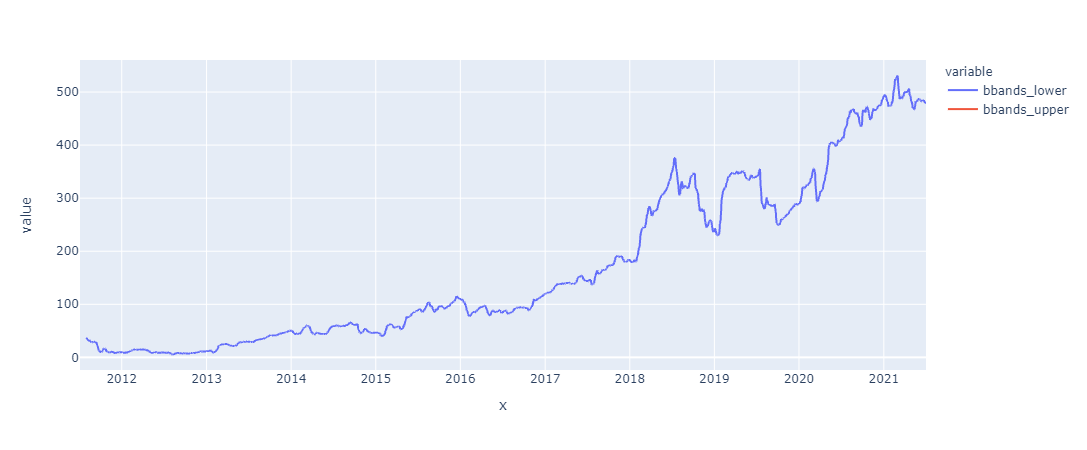

In [43]:
#fig = plt.figure(figsize=(20,10))
bbands_lower = bbands['BBL_20_2.0']
bbands_upper = bbands['BBU_20_2.0']
fig = px.line(x=hist2_stock.index, y= [bbands_lower])
fig.data[0].name="bbands_lower"
fig.update_traces(showlegend=True)
fig.add_scatter(x=hist2_stock.index, y=[bbands_upper], mode='lines', name='bbands_upper')

#candles['HA_close'], ema21_ohlc4, ema08_ohlc4, 
                                 #kc['KCLe_21_2.0'], kc['KCUe_21_2.0']], title = "Stock Chart")

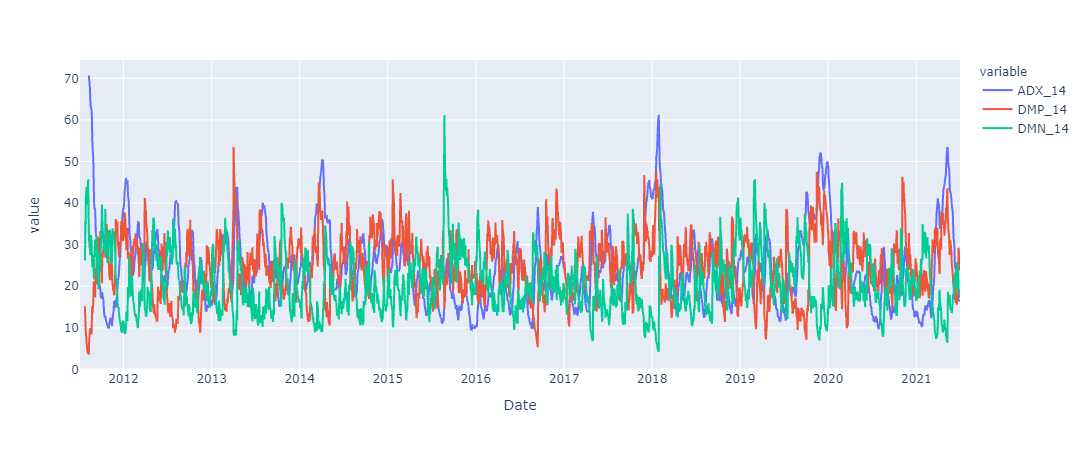

In [54]:
px.line(adx)

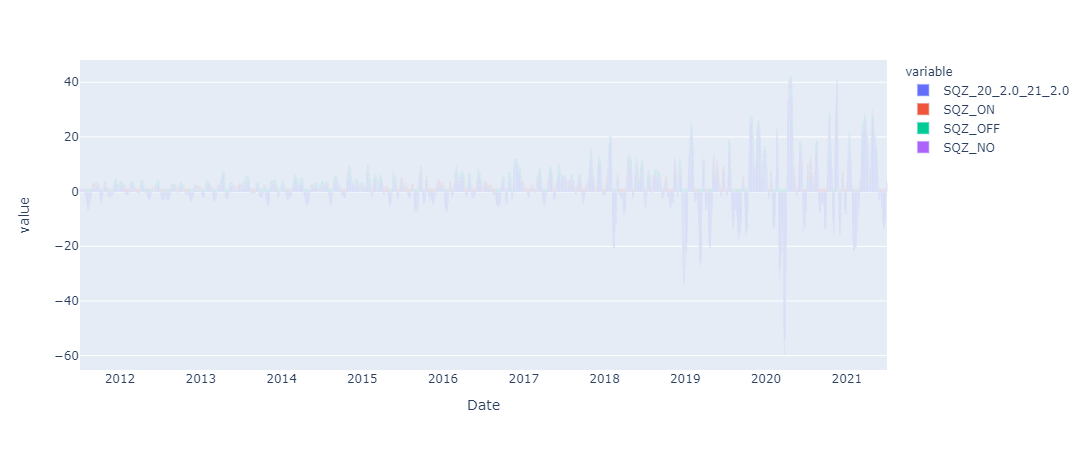

In [56]:
px.bar(squeeze)

<BarContainer object of 2516 artists>

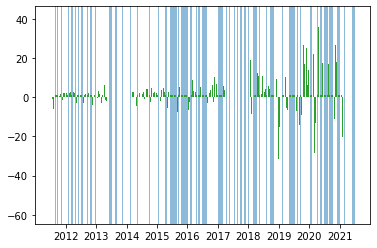

In [57]:
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(hist2_stock.index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on = plt.bar(hist2_stock.index, squeeze['SQZ_ON'])
squeeze_on


plt.bar(hist2_stock.index, squeeze['SQZ_20_2.0_21_2.0'])
#px.bar(squeeze)

In [65]:
ema21_ohlc4_vix = ta.ema(ta.ohlc4(hist_vix["Open"], hist_vix["High"], hist_vix["Low"], hist_vix["Close"]), length=21)
ema08_ohlc4_vix = ta.ema(ta.ohlc4(hist_vix["Open"], hist_vix["High"], hist_vix["Low"], hist_vix["Close"]), length=8)
#df_closing_prices.plot(figsize = (20,10))
candles_vix = ta.ha(hist_vix["Open"], hist_vix["High"], hist_vix["Low"], hist_vix["Close"], offset=None)
bbands_vix = ta.bbands(hist_vix["Close"], length=20, std=None, mamode=None, offset=None)
squeeze_vix = ta.squeeze(hist_vix["High"], hist_vix["Low"], hist_vix["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr_vix = ta.atr(hist_vix["High"], hist_vix["Low"], hist_vix["Close"], length=14, mamode="ema", drift=1, offset=0)
kc_vix = ta.kc(hist_vix["High"], hist_vix["Low"], hist_vix["Close"], length=21, scalar=2, mamode='ema', offset=0)
adx_vix = ta.adx(hist_vix["High"], hist_vix["Low"], hist_vix["Close"], length=14, scalar=100, drift=1, offset=0)

fig = plt.figure()
bbands_vix['BBL_20_2.0'].plot(figsize = (10,5), color='orange')
bbands_vix['BBU_20_2.0'].plot(figsize = (10,5), color='orange')
candles_vix['HA_close'].plot(figsize = (10,5))
ema21_ohlc4_vix.plot(figsize = (10,5), color='purple')
ema08_ohlc4_vix.plot(figsize = (10,5), color='red')
kc_vix['KCLe_21_2.0'].plot(figsize = (10,5), color='black')
kc_vix['KCUe_21_2.0'].plot(figsize = (10,5), color='black')
adx_vix.plot(figsize = (10,5))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

In [68]:
#squeeze_1[squeeze_1['SQZ_ON']==1] = 1
#fig, ax = plt.subplots()
#ax.fill_between(hist_vix.index, 0, 1, where=squeeze_1['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
#squeeze_on_vix = plt.plot(hist_vix.index, squeeze_1['SQZ_ON'])
#squeeze_on_vix

#squeeze_1['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

#fig=px
#px.bar(x=hist_vix.index, y=[squeeze_1['SQZ_20_2.0_21_2.0'], squeeze_1["SQZ_ON"]])

squeeze_vix[squeeze_vix['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
ax.fill_between(hist_vix.index, 0, 1, where=squeeze_vix['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_vix_final = plt.plot(hist_vix.index, squeeze_vix['SQZ_ON'])
squeeze_vix_final

#squeeze_vix['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
plt.bar(hist_vix.index, squeeze_vix['SQZ_20_2.0_21_2.0'], width=1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<BarContainer object of 251 artists>

In [17]:
help(ta.cdl_inside)

Help on function cdl_inside in module pandas_ta.candles.cdl_inside:

cdl_inside(open_, high, low, close, asbool=False, offset=None, **kwargs)
    Candle Type: Inside Bar
    
    An Inside Bar is a bar that is engulfed by the prior highs and lows of it's
    previous bar. In other words, the current bar is smaller than it's previous bar.
    Set asbool=True if you want to know if it is an Inside Bar. Note by default
    asbool=False so this returns a 0 if it is not an Inside Bar, 1 if it is an
    Inside Bar and close > open, and -1 if it is an Inside Bar but close < open.
    
    Sources:
        https://www.tradingview.com/script/IyIGN1WO-Inside-Bar/
    
    Calculation:
        Default Inputs:
            asbool=False
        inside = (high.diff() < 0) & (low.diff() > 0)
    
        if not asbool:
            inside *= candle_color(open_, close)
    
    Args:
        open_ (pd.Series): Series of 'open's
        high (pd.Series): Series of 'high's
        low (pd.Series): Series 

In [60]:
hist2_stock.head()

Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2011-07-05  45.424576  45.450249  44.731397  45.227745  4822300        0.0   
2011-07-06  45.227761  45.544400  44.971029  45.467381  5319100        0.0   
2011-07-07  45.595723  45.783995  44.474659  45.039471  7559100        0.0   
2011-07-08  44.500342  44.774190  44.106686  44.568806  6927300        0.0   
2011-07-11  43.969767  44.106691  43.422071  43.593224  6037500        0.0   

            Stock Splits  
Date                      
2011-07-05             0  
2011-07-06             0  
2011-07-07             0  
2011-07-08             0  
2011-07-11             0

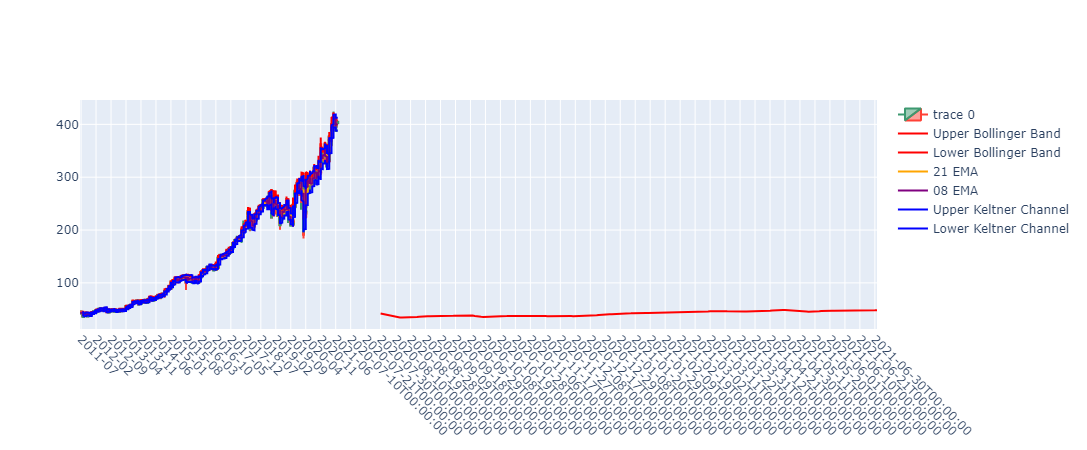

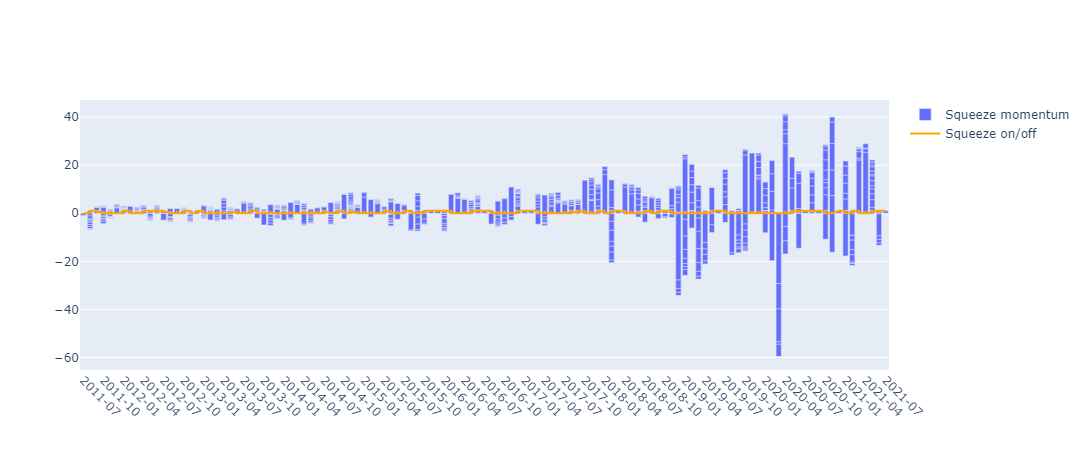

In [61]:
hist2_stock.index = pd.to_datetime(hist2_stock.index, format = '%Y/%m').strftime('%Y-%m')
candlestick = go.Candlestick(x=hist2_stock.index, open=hist2_stock['Open'], high=hist2_stock['High'], low=hist2_stock['Low'],
                close=hist2_stock['Close'])
upper_band = go.Scatter(x=hist2_stock.index, y=bbands['BBU_20_2.0'], name='Upper Bollinger Band', line={'color': 'red'})
lower_band = go.Scatter(x=hist_dow.index, y=bbands['BBL_20_2.0'], name='Lower Bollinger Band', line={'color': 'red'})
ema21_sq = go.Scatter(x=hist2_stock.index, y=ema21_ohlc4, name='21 EMA', line={'color': 'orange'})
ema08_sq = go.Scatter(x=hist2_stock.index, y=ema08_ohlc4, name='08 EMA', line={'color': 'purple'})
squeeze_plot = go.Bar(x=hist2_stock.index, y=squeeze['SQZ_20_2.0_21_2.0'], name='Squeeze momentum', base={'color': 'blue'})
squeeze_fire = go.Scatter(x=hist2_stock.index, y=squeeze['SQZ_ON'], name='Squeeze on/off', line={'color': 'orange'})
upper_keltner = go.Scatter(x=hist2_stock.index, y=kc['KCUe_21_2.0'], name='Upper Keltner Channel', line={'color': 'blue'})
lower_keltner = go.Scatter(x=hist2_stock.index, y=kc['KCLe_21_2.0'], name='Lower Keltner Channel', line={'color': 'blue'})



fig = go.Figure(data=[candlestick, upper_band, lower_band, ema21_sq, ema08_sq,
                      upper_keltner, lower_keltner])
fig.layout.xaxis.type = 'category'
fig.layout.xaxis.rangeslider.visible = False
fig.update_xaxes(tickangle=45)
fig.show()

fig2 = go.Figure(data=[squeeze_plot, squeeze_fire])
fig2.layout.xaxis.type = 'category'
fig2.layout.xaxis.rangeslider.visible = False
fig2.update_xaxes(tickangle=45)
fig2.show()

In [69]:
def squeeze_dow():
    squeeze_dow = ta.squeeze(hist_dow["High"], hist_dow["Low"], hist_dow["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, 
                         mom_length=12, mom_smooth=6, use_tr=None, offset=None)
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax.fill_between(hist_dow.index, 0, 1, where=squeeze_dow['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
    squeeze_dow_final = plt.plot(hist_dow.index, squeeze_dow['SQZ_ON'])
    squeeze_dow_final
    plt.bar(hist_dow.index, squeeze_dow['SQZ_20_2.0_21_2.0'], width=1)
    return fig, ax

squeeze_dow()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(<Figure size 2000x1000 with 1 Axes>, <AxesSubplot:>)

In [ ]:
#Defining all the plots for the dashboard. 
def figure_dow():
    fig = plt.figure()
    bbands_dow['BBL_20_2.0'].plot(figsize = (20,10), color = 'orange')
    bbands_dow['BBU_20_2.0'].plot(figsize = (20,10), color = 'orange')
    candles_dow['HA_close'].plot(figsize = (20,10))
    ema21_ohlc4_dow.plot(figsize = (20,10), color = 'purple')
    ema08_ohlc4_dow.plot(figsize = (20,10), color = 'red')
    kc_dow['KCLe_21_2.0'].plot(figsize = (20,10), color = 'black')
    kc_dow['KCUe_21_2.0'].plot(figsize = (20,10), color = 'black')
    plt.close(fig)
    return fig

def adx_dow():
    fig =  plt.figure()
    adx_dow.plot(figsize = (20,10))
    plt.close(fig)
    return fig

def squeeze_dow():
    squeeze_dow = ta.squeeze(hist_dow["High"], hist_dow["Low"], hist_dow["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, 
                         mom_length=12, mom_smooth=6, use_tr=None, offset=None)
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax.fill_between(hist_dow.index, 0, 1, where=squeeze_dow['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
    squeeze_dow_final = plt.plot(hist_dow.index, squeeze_dow['SQZ_ON'])
    squeeze_dow_final
    plt.bar(hist_dow.index, squeeze_dow['SQZ_20_2.0_21_2.0'], width=1)
    return fig, ax


def figure_spy():
    fig = plt.figure()
    bbands['BBL_20_2.0'].plot(figsize = (20,10))
    bbands['BBU_20_2.0'].plot(figsize = (20,10))
    candles['HA_close'].plot(figsize = (20,10))
    ema21_ohlc4.plot(figsize = (20,10))
    ema08_ohlc4.plot(figsize = (20,10))
    kc['KCLe_21_2.0'].plot(figsize = (20,10))
    kc['KCUe_21_2.0'].plot(figsize = (20,10))
    return fig

def adx_spy():
    fig =  plt.figure()
    adx_spy.plot(figsize = (20,10))
    plt.close(fig)
    return fig

def squeeze_spy():
    squeeze_spy = ta.squeeze(hist_spy["High"], hist_spy["Low"], hist_spy["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, 
                         mom_length=12, mom_smooth=6, use_tr=None, offset=None)
    squeeze_spy[squeeze_spy['SQZ_ON']==1] = 1
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax.fill_between(hist_spy.index, 0, 1, where=squeeze_spy['SQZ_ON'], alpha=0.4, transform=ax.get_xaxis_transform())
    squeeze_spy_final = plt.plot(hist_spy.index,squeeze_spy['SQZ_ON'])
    squeeze_spy_final
    squeeze_spy['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
    return fig

def figure_stock_mo(stock):
    fig = plt.figure()
    #bbands['BBL_20_2.0'].plot(figsize = (20,10))
    #bbands['BBU_20_2.0'].plot(figsize = (20,10))
    candles_mo[stock]['HA_close'].plot(figsize = (10,5))
    ema21_ohlc4_mo[stock].plot(figsize = (10,5))
    ema08_ohlc4_mo[stock].plot(figsize = (10,5))
    #kc['KCLe_21_2.0'].plot(figsize = (20,10))
    #kc['KCUe_21_2.0'].plot(figsize = (20,10))
    plt.close(fig)
    return fig
def squeeze_baba():
    squeeze[squeeze['SQZ_ON']==1] = 1
    fig, ax = plt.subplots()
    ax.fill_between(baba_df['BABA'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
    squeeze_on_dis = plt.plot(baba_df['BABA'].index, squeeze['SQZ_ON'])
    sqz = squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
    return fig
def figure_tsla():
    fig = plt.figure()
    bbands['BBL_20_2.0'].plot(figsize = (20,10))
    bbands['BBU_20_2.0'].plot(figsize = (20,10))
    candles['HA_close'].plot(figsize = (20,10))
    ema21_ohlc4.plot(figsize = (20,10))
    ema08_ohlc4.plot(figsize = (20,10))
    kc['KCLe_21_2.0'].plot(figsize = (20,10))
    kc['KCUe_21_2.0'].plot(figsize = (20,10))
    plt.close(fig)
    return fig
def squeeze_tsla():
    squeeze[squeeze['SQZ_ON']==1] = 1
    fig, ax = plt.subplots()
    ax.fill_between(tsla_df['TSLA'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
    squeeze_on_dis = plt.plot(tsla_df['TSLA'].index, squeeze['SQZ_ON'])
    sqz = squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
    return fig

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Column
    [0] Column
        [0] Select(name='stock', options=['NFLX', 'AAPL', ...], value='NFLX')
    [1] Row
        [0] Matplotlib(Figure, tight=True)
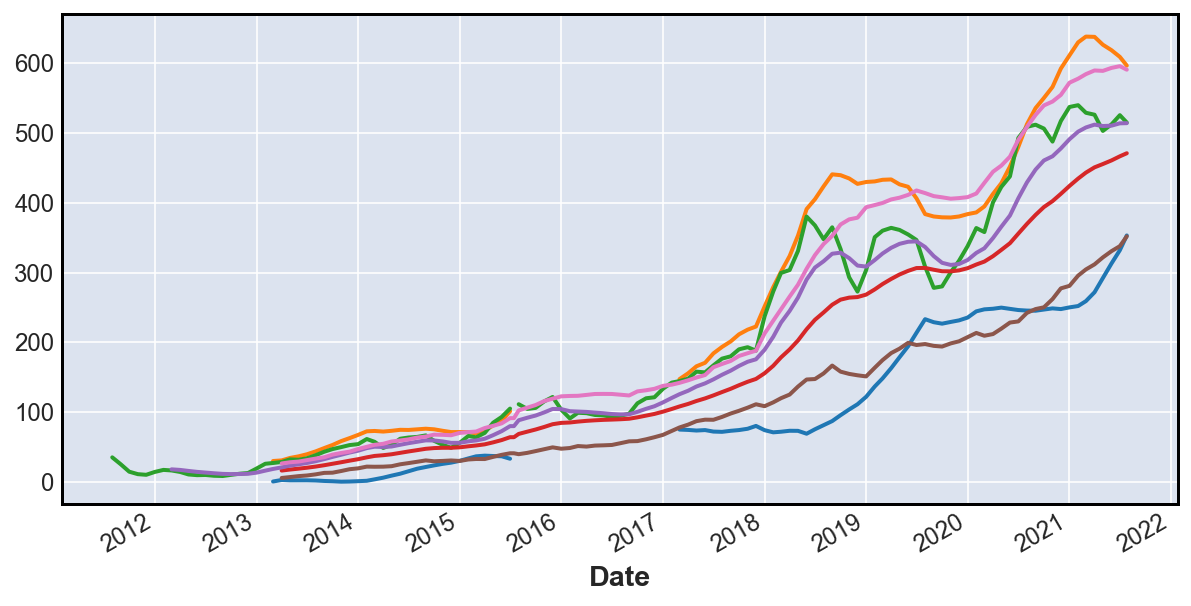

In [73]:
from panel.interact import interact

def figure_stock_mo(stock):
    fig = plt.figure()
    bbands_mo[stock]['BBL_20_2.0'].plot(figsize = (10,5))
    bbands_mo[stock]['BBU_20_2.0'].plot(figsize = (10,5))
    
    candles_mo[stock]['HA_close'].plot(figsize = (10,5))
    ema21_ohlc4_mo[stock].plot(figsize = (10,5))
    ema08_ohlc4_mo[stock].plot(figsize = (10,5))
    kc_mo[stock]['KCLe_21_2.0'].plot(figsize = (10,5))
    kc_mo[stock]['KCUe_21_2.0'].plot(figsize = (10,5))
    adx_mo[stock].plot(figsize = (10,5))
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True)


ticker = monthly_data["ticker"].unique()
interact(figure_stock_mo, stock=ticker)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Column
    [0] Column
        [0] Select(name='stock', options=['NFLX', 'AAPL', ...], value='NFLX')
    [1] Row
        [0] Matplotlib(Figure, tight=True)
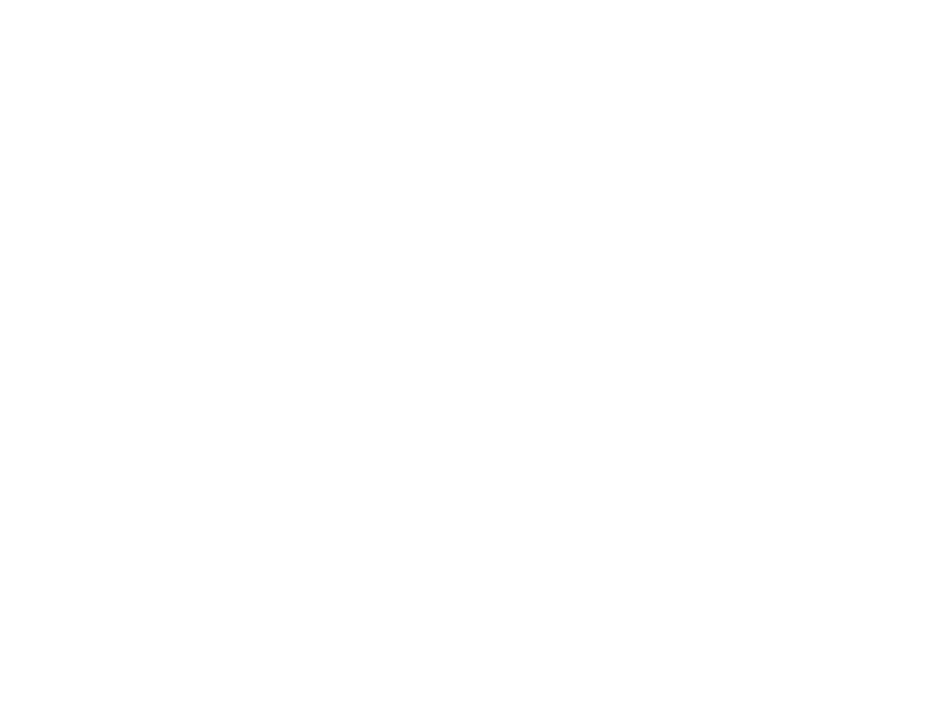

In [71]:
def figure_adx_mo(stock):
    #adx_mo[stock] = ta.adx(ticker_dict_1mo[stock]["High"], ticker_dict_1mo[stock]["Low"], ticker_dict_1mo[stock]["Close"], 
                           #length=14, scalar=100, drift=1, offset=0)
    fig=plt.figure()
    adx_mo[stock].plot(figsize=(10,5))
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True)

ticker = monthly_data["ticker"].unique()
interact(figure_adx_mo, stock=ticker)

In [22]:
def squeeze_mo(stock):
    squeeze_mo = ta.squeeze(ticker_dict_1mo[stock]["High"], ticker_dict_1mo[stock]["Low"], ticker_dict_1mo[stock]["Close"], 
                            bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
    squeeze_mo[stock][squeeze_mo[stock]['SQZ_ON']==1] = 1
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(5)
    ax.fill_between(ticker_dict_1mo[stock].index, 0, 1, where=squeeze_mo[stock]['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
    squeeze_mo_final = plt.plot(ticker_dict_1mo[stock].index, squeeze_mo[stock]['SQZ_ON'])
    squeeze_mo_final
    plt.bar(ticker_dict_1mo[stock].index, squeeze_mo[stock]['SQZ_20_2.0_21_2.0'], width=5)
    return fig, ax

ticker = monthly_data["ticker"].unique()
interact(squeeze_mo, stock=ticker)

KeyError: 'NFLX'

In [23]:
# Create a Title for the Dashboard
title = 'Analysis of Stocks'
#stock_info = pn.Column(title, density(), sharpe(), beta_baba(), beta_tsla(), beta_dis(), heatmap()) 
# Create a tab layout for the dashboard
#disney_tab = pn.Column(figure_dis(), squeeze_dis())
#spy_tab = pn.Column(figure_spy(), squeeze_spy())
#tsla_tab = pn.Column(figure_tsla(), squeeze_tsla())
monthly_tab = pn.Column(interact(figure_stock_mo, stock=ticker))
# Create the dashboard
Tabs = pn.Tabs(
    ('Monthly charts', monthly_tab))

Dashboard = pn.Column(pn.Row(title), Tabs)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Column
    [0] Row
        [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Column
                [0] Column
                    [0] Select(name='stock', options=['NFLX', 'AAPL', ...], value='NFLX')
                [1] Row
                    [0] Matplotlib(Figure, tight=True)
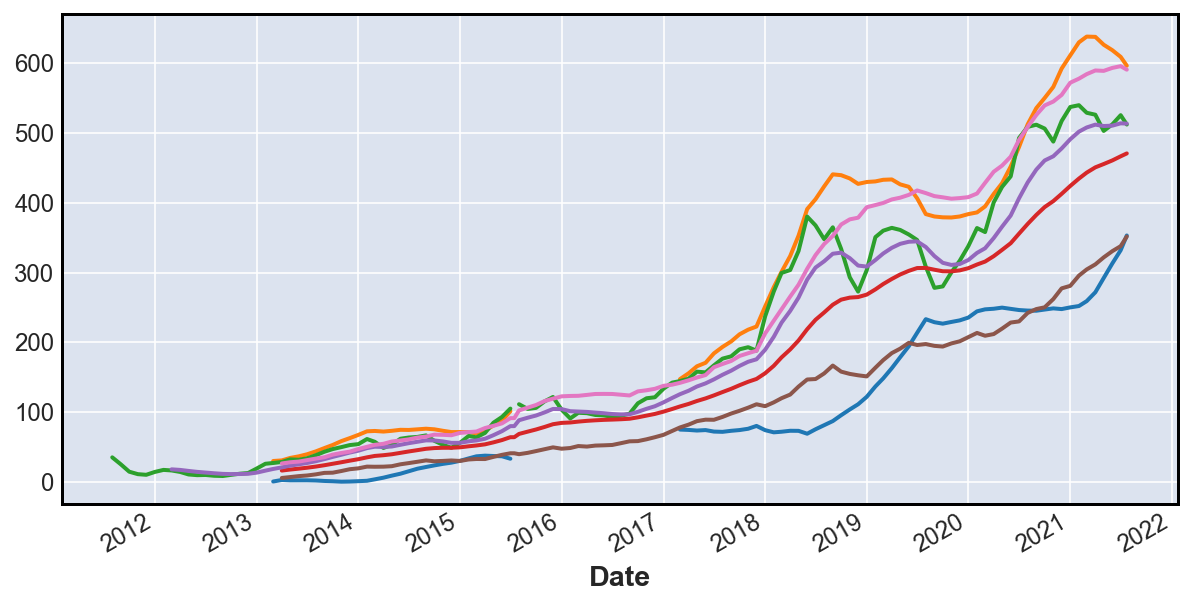

In [24]:
Dashboard.servable()